In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from funciones_aux import imprimir_resultados, guardar_resultado_en_csv, RUTA_TRAIN, RUTA_TEST
import tensorflow as tf

In [14]:
df_train = pd.read_csv(RUTA_TRAIN)
df_test = pd.read_csv(RUTA_TEST)

In [15]:
df_train["sentimiento"] = df_train["sentimiento"].map({"positivo": 1, "negativo": 0})

In [16]:
RUTA_GUARDADO = "RED.csv"

In [17]:
df_train.head(5)

,Unnamed: 0,ID,review_es,sentimiento,idioma_detectado
0,0,0,Uno de los otros críticos ha mencionado que de...,1,es
1,1,1,Una pequeña pequeña producción.La técnica de f...,1,es
2,2,2,Pensé que esta era una manera maravillosa de p...,1,es
3,3,3,"Básicamente, hay una familia donde un niño peq...",0,es
4,4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",1,es


In [18]:
total_reviews = df_train["review_es"].astype(str)
total_labels = df_train["sentimiento"].values

In [19]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Entrenamiento")
    plt.plot(history.history["val_accuracy"], label="Validación")
    plt.title("Precisión del Modelo")
    plt.xlabel("Épocas")
    plt.ylabel("Precisión")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Entrenamiento")
    plt.plot(history.history["val_loss"], label="Validación")
    plt.title("Pérdida del Modelo")
    plt.xlabel("Épocas")
    plt.ylabel("Pérdida")
    plt.legend()

    plt.show()

In [20]:
Y_data = df_train.sentimiento

In [21]:
max_words = 5000
max_len = 100

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [23]:
tokenizer_obj = Tokenizer(num_words = max_words)
tokenizer_obj.fit_on_texts(total_reviews)

In [24]:
X_data_tokens = tokenizer_obj.texts_to_sequences(total_reviews)

In [25]:
X_data_count = tokenizer_obj.sequences_to_matrix(X_data_tokens, mode = "count")

In [26]:
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_data_count, Y_data, test_size = 0.3, random_state = 123)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorboard.plugins.hparams import api as hp

In [28]:
model_count = Sequential()
model_count.add(Dense(100, activation="relu", input_shape=(5000,)))
model_count.add(Dense(25, activation="relu"))
model_count.add(Dense(1, activation="sigmoid"))

model_count.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

/home/taiel/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
history_count = model_count.fit(X_train_count, y_train_count, batch_size = 256, epochs = 15, validation_split=0.3)

Epoch 1/15


2024-06-20 11:14:33.475743: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 472160000 exceeds 10% of free system memory.


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7335 - loss: 0.5209 - val_accuracy: 0.8698 - val_loss: 0.3206
Epoch 2/15


2024-06-20 11:14:35.789148: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 202380000 exceeds 10% of free system memory.


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9073 - loss: 0.2433 - val_accuracy: 0.8704 - val_loss: 0.3203
Epoch 3/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9305 - loss: 0.1909 - val_accuracy: 0.8672 - val_loss: 0.3433
Epoch 4/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9505 - loss: 0.1480 - val_accuracy: 0.8649 - val_loss: 0.3678
Epoch 5/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9696 - loss: 0.0945 - val_accuracy: 0.8658 - val_loss: 0.4075
Epoch 6/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9826 - loss: 0.0657 - val_accuracy: 0.8621 - val_loss: 0.4952
Epoch 7/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9969 - loss: 0.0217 - val_accuracy: 0.8594 - val_loss: 0.5571
Epoch 8/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9995 - loss: 0.0079 - val_accuracy: 0.8601 - val_loss: 0.6305
Epoch 9/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9996 - loss: 0.0041 - val_accuracy: 0.8596 - val_loss: 0.6847
Epo

In [30]:
test_loss, test_acc = model_count.evaluate(X_test_count, y_test_count)
print()
print(test_loss, test_acc)

221/452 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8645 - loss: 0.8312

2024-06-20 11:14:44.457624: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 289100000 exceeds 10% of free system memory.


452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8634 - loss: 0.8487

0.8756024241447449 0.8614320158958435


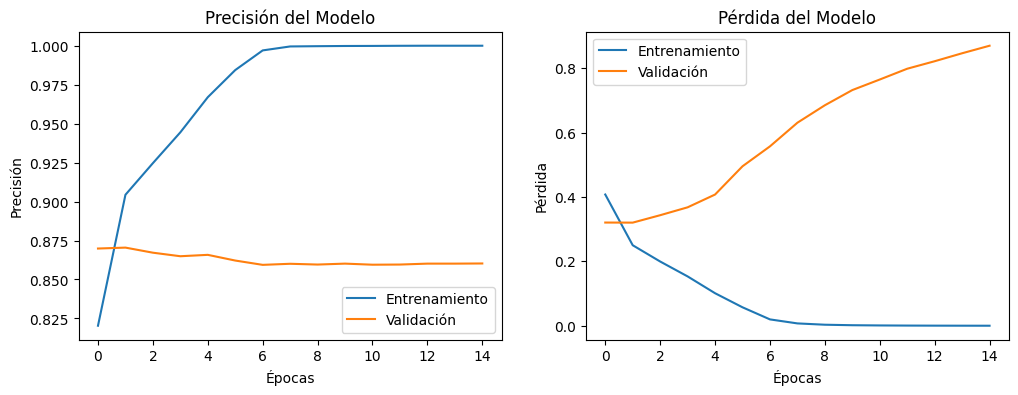

In [31]:
plot_training_history(history_count)

In [32]:
X_train_tokens = tokenizer_obj.texts_to_sequences(df_test["review_es"])
X_train_count = tokenizer_obj.sequences_to_matrix(X_train_tokens, mode = "count")
y_pred = model_count.predict(X_test_count)
y_pred = np.round(y_pred)

208/452 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step

2024-06-20 11:14:49.155052: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 289100000 exceeds 10% of free system memory.


452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step


F1: 0.8611630969709573
Precision: 0.8649401280980228
Recall: 0.8574189095928226
Accuracy: 0.8614320304392944


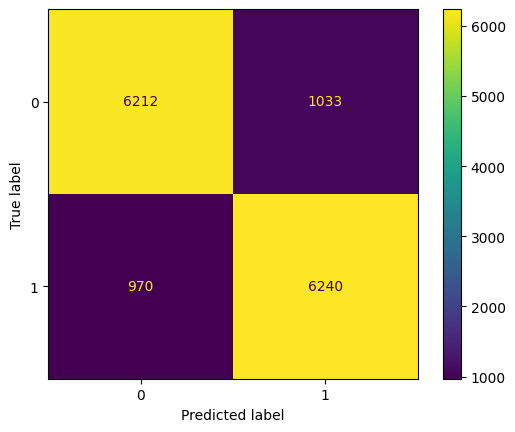

In [33]:
imprimir_resultados(y_test_count, y_pred)

In [34]:
X_test_tokens = tokenizer_obj.texts_to_sequences(df_test["review_es"])
X_test_count = tokenizer_obj.sequences_to_matrix(X_test_tokens, mode = "count")
y_pred = model_count.predict(X_test_count)
y_pred = np.round(y_pred)

220/269 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step

2024-06-20 11:14:53.751003: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 171980000 exceeds 10% of free system memory.


269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step


In [35]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [36]:
y_pred = np.where(y_pred == 0, "negativo", "positivo")

In [37]:
df_predicciones = pd.DataFrame({"ID": df_test["ID"], "prediccion": y_pred.flatten()})

df_predicciones.to_csv(RUTA_GUARDADO, header=["ID", "sentimiento"], index=False)